In [1]:
import torch
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt

## 查看資料

In [2]:
train_df = pd.read_csv('./online_shoppers_intention.csv')
train_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
train_df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [4]:
train_df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

#### 查看各個分類的總數量

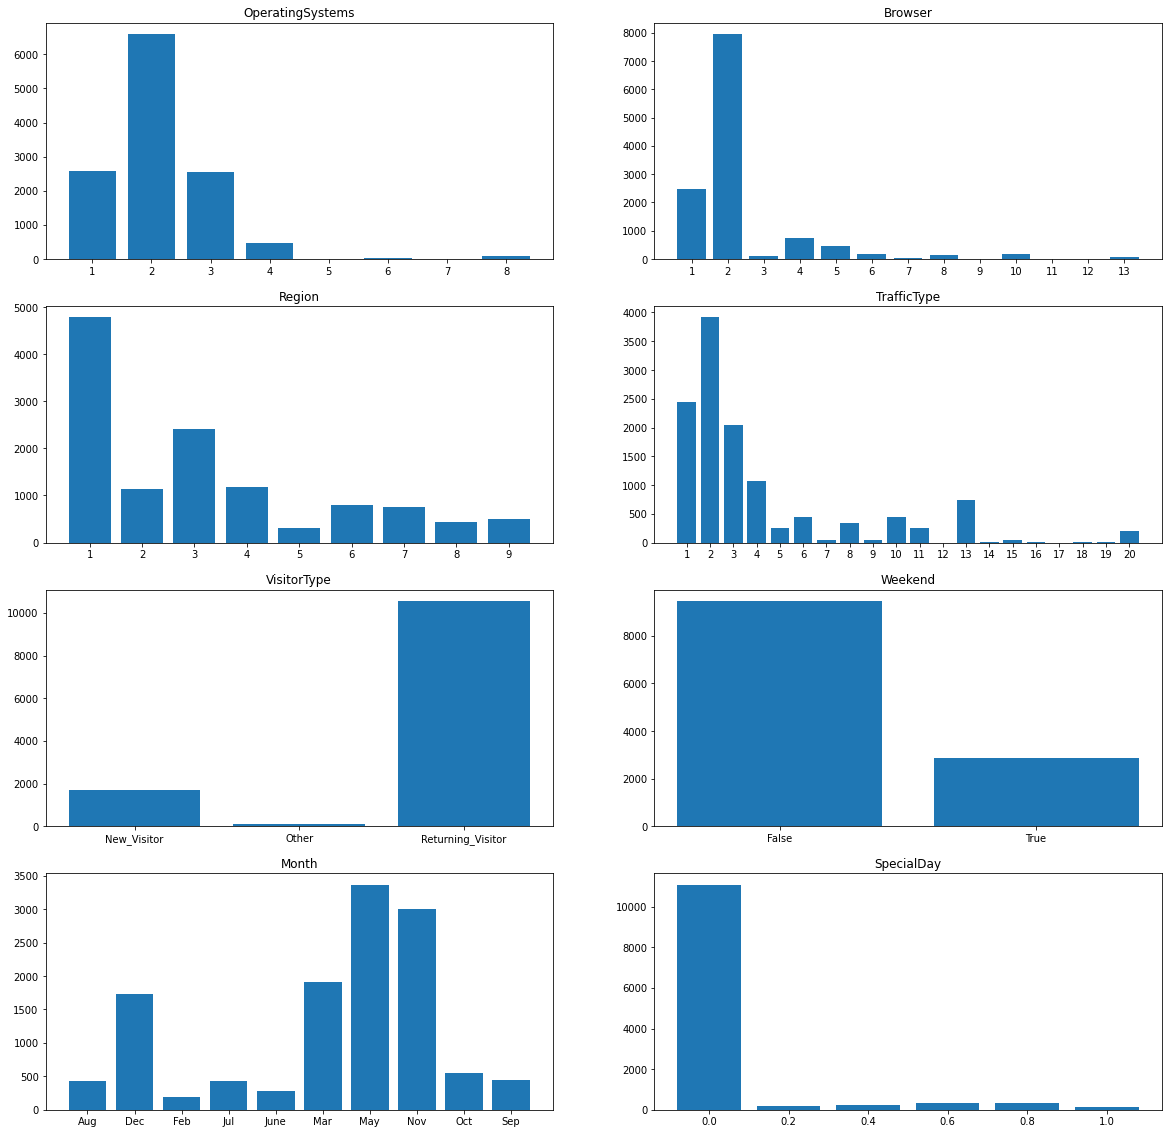

In [5]:
fig, axes = plt.subplots(4, 2, figsize=(20,20))
columns = ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Month', 'SpecialDay']

for index, column in enumerate(columns):
    x = (i[0]for i in train_df.groupby(by=column))
    y = [len(i[1]) for i in train_df.groupby(by=column)]
    plt.subplot(4, 2, index+1)
    plt.xticks(range(1, len(y)+1) , x)
    plt.bar(range(1, len(y)+1), y)
    plt.title(column)

#### 查看各個不同欄位不同分類的購買成功率

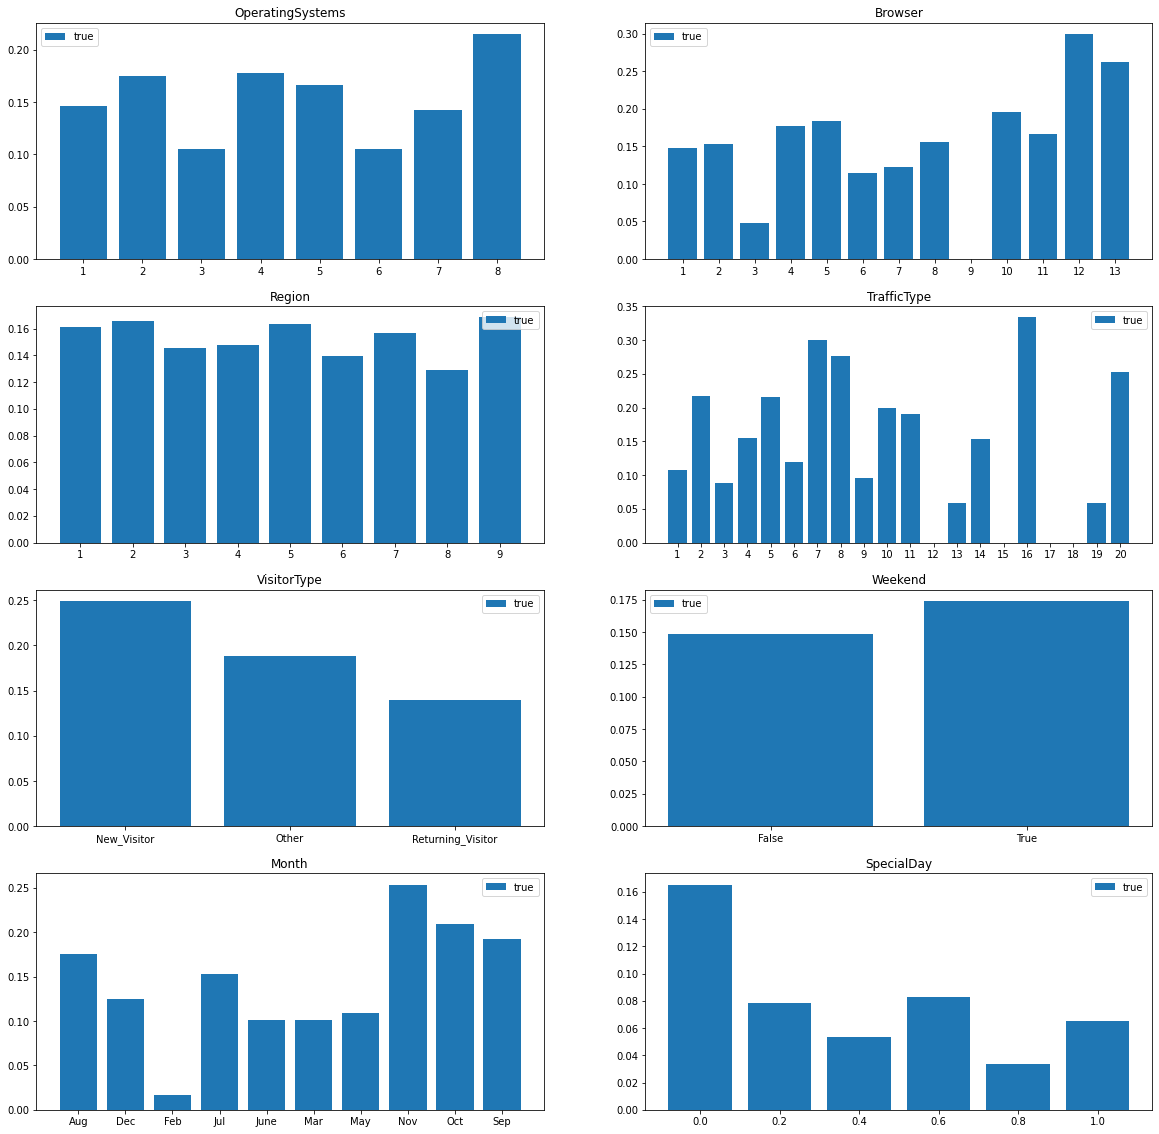

In [6]:
fig, axes = plt.subplots(4, 2, figsize=(20,20))
columns = ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Month', 'SpecialDay']
predict = train_df['Revenue']
width=0.8

for index, column in enumerate(columns):
    tmp = train_df.groupby(by=column)

    x = [i[0]for i in tmp]
    true_num = len(train_df[train_df['Revenue'] == True])
    false_num = len(train_df[train_df['Revenue'] == False])

    x_true  = [i for i in range(1, len(x)+1)]
    y_true  = [len(i[1][ i[1]['Revenue'] == True ])/len(i[1]) for i in tmp]
    
    plt.subplot(4, 2, index+1)
    plt.xticks(range(1, len(x)+1) , x)
    plt.bar(x_true, y_true, width=width,label='true')
    plt.legend()
    plt.title(column)

#### 查看頁面的數量統計
x軸：次數
y軸：累計數量

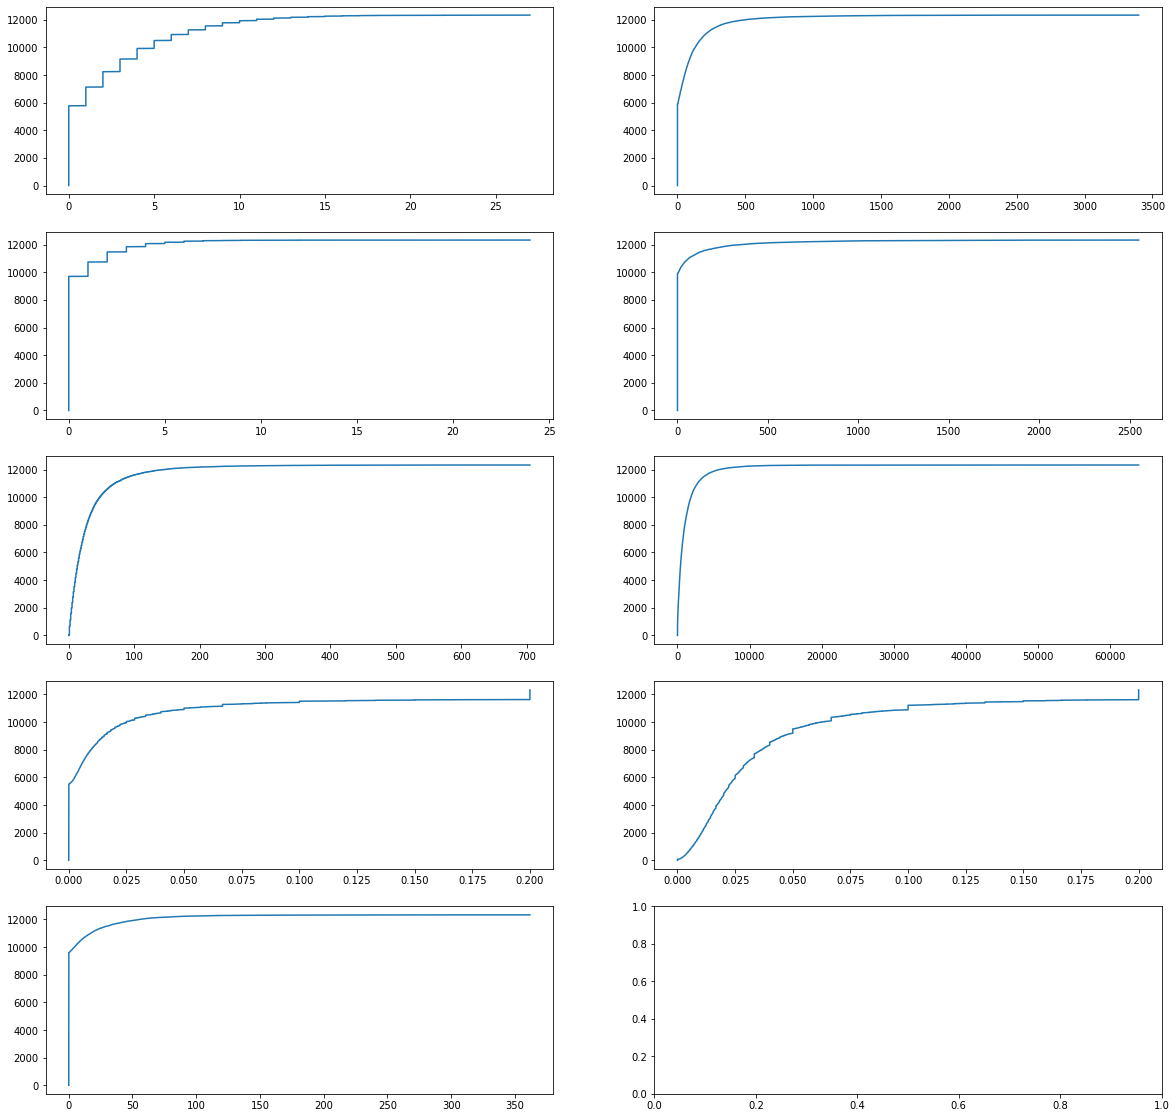

In [7]:
columns = [
    'Administrative', 'Administrative_Duration', 
    'Informational',  'Informational_Duration', 
    'ProductRelated', 'ProductRelated_Duration',
    'BounceRates',    'ExitRates',
    'PageValues']
fig, axes = plt.subplots(5, 2, figsize=(20,20))

for (index, column) in enumerate(columns):
    tmp_df = train_df.sort_values(by=column)
    plt.subplot(5, 2, index+1)
    plt.plot(tmp_df[column].tolist(), range(len(tmp_df[column])))

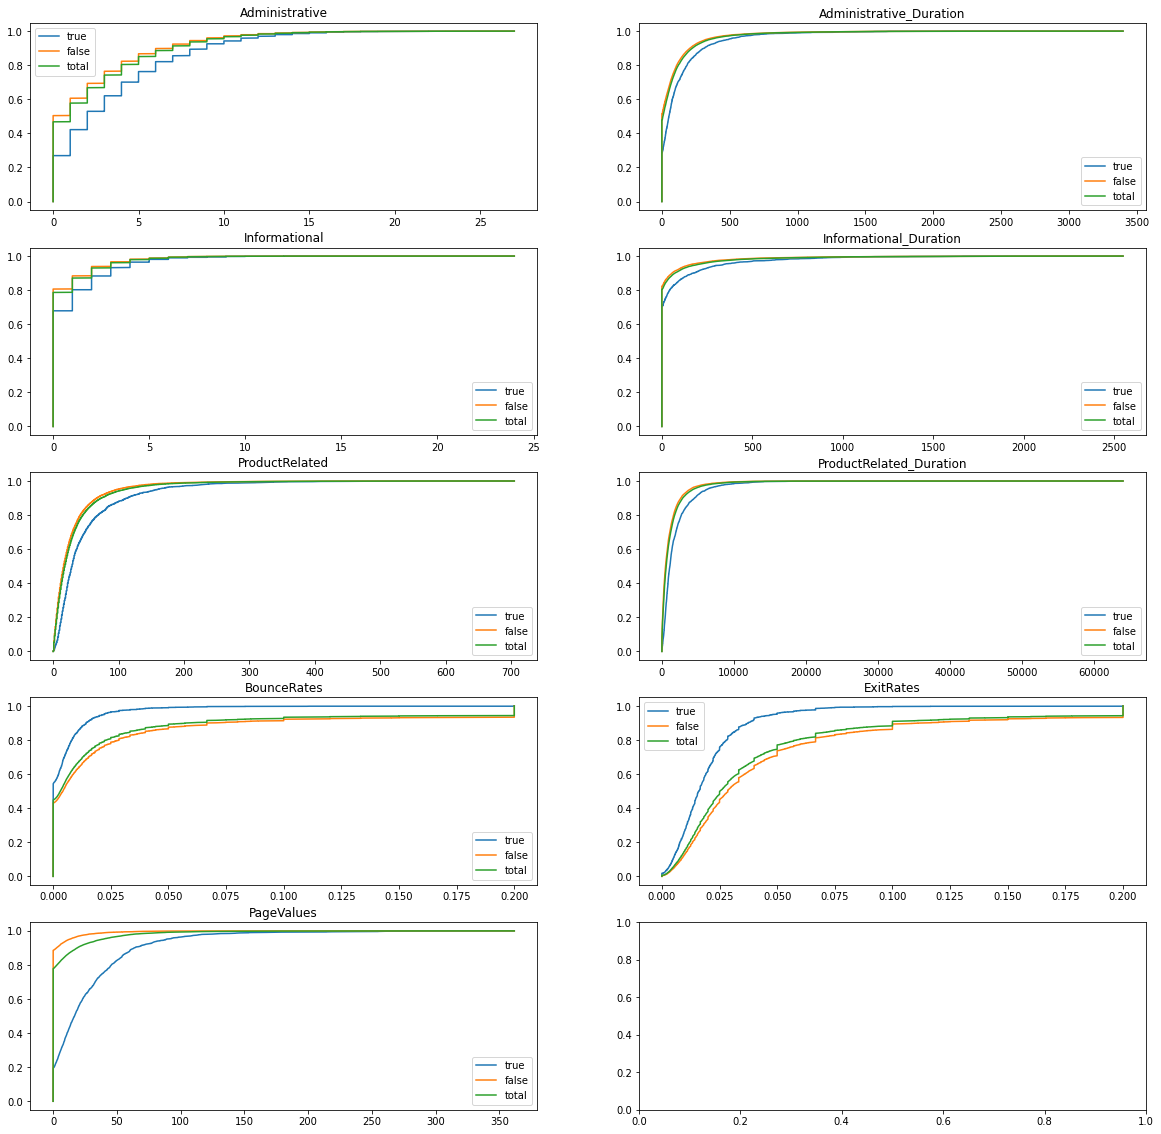

In [8]:
columns = [
    'Administrative', 'Administrative_Duration', 
    'Informational',  'Informational_Duration', 
    'ProductRelated', 'ProductRelated_Duration',
    'BounceRates',    'ExitRates',
    'PageValues']
fig, axes = plt.subplots(5, 2, figsize=(20,20))

true_revenue = len(train_df[train_df['Revenue'] == True])
false_revenue = len(train_df[train_df['Revenue'] == False])


for (index, column) in enumerate(columns):
    tmp_df = train_df.sort_values(by=column)
    
    true_num  = 0
    false_num = 0
    y_true = []
    y_false = []
    
    for i in tmp_df['Revenue']:
        if i == True:
            true_num += 1
        else:
            false_num += 1    
        y_true.append(true_num/true_revenue)
        y_false.append(false_num/false_revenue)
        
    plt.subplot(5, 2, index+1)
    plt.plot(tmp_df[column].tolist(), y_true, label='true')
    plt.plot(tmp_df[column].tolist(), y_false, label = 'false')
    plt.plot(tmp_df[column].tolist(), [i/len(tmp_df[column]) for i in range(len(tmp_df[column]))], label = 'total')
    plt.legend()
    plt.title(column)

### Data Preprocess
先將非數值資料轉化

In [83]:
x_dict= {}

x_dict['VisitorType'] = []
for i in train_df['VisitorType']:
    if i == 'New_Visitor':
        x_dict['VisitorType'].append(0)
    if i == 'Returning_Visitor':
        x_dict['VisitorType'].append(1)
    if i == 'Other':
        x_dict['VisitorType'].append(2)

x_dict['Weekend'] = []
for i in train_df['Weekend']:
    if i == False:
        x_dict['Weekend'].append(0)
    if i == True:
        x_dict['Weekend'].append(1)


x_dict['Month'] = []
month_list = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for i in train_df['Month']:
    x_dict['Month'].append(month_list.index(i))

In [84]:
#     'Administrative', 'Administrative_Duration', 
#     'Informational',  'Informational_Duration', 
#     'ProductRelated', 'ProductRelated_Duration',

X = pd.DataFrame({
    'Month':            x_dict['Month'],
    'Weekend':          x_dict['Weekend'],
    'VisitorType':      x_dict['VisitorType'],
    'OperatingSystems': train_df['OperatingSystems'],
    'Browser':          train_df['Browser'],
    'Region':           train_df['Region'],
    'TrafficType':      train_df['TrafficType'],
    'SpecialDay':       train_df['SpecialDay'],
    'BounceRates':      train_df['BounceRates'],
    'ExitRates':        train_df['ExitRates'],
    'PageValues':       train_df['PageValues'],
    'Administrative':   train_df['Administrative'],
    'Informational':    train_df['Informational'],
    'ProductRelated':   train_df['ProductRelated'],
    'Administrative_Duration': train_df['Administrative_Duration'],
    'Informational_Duration':  train_df['Informational_Duration'],
    'ProductRelated_Duration': train_df['ProductRelated_Duration']
})

Y = [ 1 if i == True else 0 for i in train_df['Revenue']]

#### Train Model
使用 1/5 的資料作為 test set

In [85]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, Y, test_size=0.2, random_state=20)

Logistic Regression
train   acc: 0.8805758313057583
test     acc: 0.8844282238442822


/Users/0210amy/Desktop/school/schoolwork/data_analystic/FDA_HW3/venv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


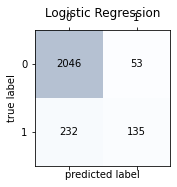


Random Forest
train   acc: 1.0
test     acc: 0.9034874290348743


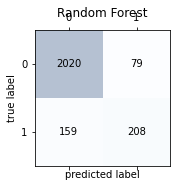

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

models = [
    ('Logistic Regression', LogisticRegression(random_state=0)),
    ('Random Forest', RandomForestClassifier(random_state=0))
]

for model_name, model in models:
    print(model_name)

    clf = model.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    clf.score(X_val, y_val)
    
    print(f'train   acc: {clf.score(X_train, y_train)}')
    print(f'test     acc: {clf.score(X_val, y_val)}')
    
    confmat = confusion_matrix(y_true=y_val, y_pred=y_pred)

    fig, ax = plt.subplots(figsize=(2.5, 2.5))

    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i,j], va='center', ha='center')
    plt.xlabel('predicted label')        
    plt.ylabel('true label')
    plt.title(model_name)
    plt.show()
    
    print()

### Improve 1
使用前面的結果作為 baseline 來做 improve

#### Data Preprocess

減少丟入的欄位，只留下發現影響比較大的

In [94]:
X = pd.DataFrame({
    'VisitorType': x_dict['VisitorType'],
    'Weekend':     x_dict['Weekend'],
    'Month':       x_dict['Month'], 
    'BounceRates':    train_df['BounceRates'],
    'ExitRates':      train_df['ExitRates'],
    'PageValues':     train_df['PageValues'],
})
Y = [ 1 if i == True else 0 for i in train_df['Revenue']]

# not_used = ['Month', 'VisitorType', 'Weekend']

# columns = [
#     'OperatingSystems', 'Browser', 
#     'Region',           'TrafficType', 
#     'SpecialDay',
#     'Administrative', 'Administrative_Duration', 
#     'Informational',  'Informational_Duration', 
#     'ProductRelated', 'ProductRelated_Duration',
#     'BounceRates',    'ExitRates',
#     'PageValues']

# X = train_df.copy()
# X = X.drop(columns=['Revenue', 'Month', 'VisitorType', 'Weekend', 'Informational', 'Administrative'])

# Y = [ 1 if i == True else 0 for i in train_df['Revenue']]

### Train Model

In [95]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, Y, test_size=0.2, random_state=20)

Logistic Regression
train   acc: 0.8809813463098135
val     acc: 0.8909164639091647


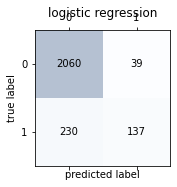


Random Forest
train   acc: 0.9935117599351176
val     acc: 0.8990267639902676


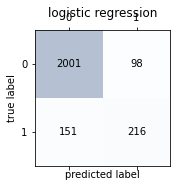

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

models = [
    ('Logistic Regression', LogisticRegression(random_state=0)),
    ('Random Forest', RandomForestClassifier(random_state=0))
]

for model_name, model in models:
    print(model_name)

    clf = model.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    clf.score(X_val, y_val)
    
    print(f'train   acc: {clf.score(X_train, y_train)}')
    print(f'val     acc: {clf.score(X_val, y_val)}')
    
    confmat = confusion_matrix(y_true=y_val, y_pred=y_pred)

    fig, ax = plt.subplots(figsize=(2.5, 2.5))

    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i,j], va='center', ha='center')
    plt.xlabel('predicted label')        
    plt.ylabel('true label')
    plt.title('logistic regression')
    plt.show()
    
    print()

### Improvement 2

由於 random forest 明顯 overfitting ，調整參數看看有沒有辦法使其增加準確率

- max_leaf_nodes: 限制 leaf 的數量，不要使其分得太細
- min_samples_split: 超過一定數量才能夠分 leaf，原因同上

Logistic Regression
train   acc: 0.8809813463098135
val     acc: 0.8909164639091647


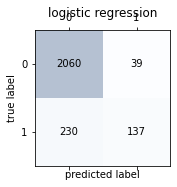


Random Forest
train   acc: 0.9186942416869425
val     acc: 0.9047039740470397


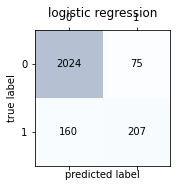

In [111]:
models = [
    ('Logistic Regression', LogisticRegression(random_state=0)),
    ('Random Forest', RandomForestClassifier(
        random_state=0,
        max_leaf_nodes=70,
        min_samples_split=10,
        criterion='entropy'))
]

for model_name, model in models:
    print(model_name)

    clf = model.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    clf.score(X_val, y_val)
    
    print(f'train   acc: {clf.score(X_train, y_train)}')
    print(f'val     acc: {clf.score(X_val, y_val)}')
    
    confmat = confusion_matrix(y_true=y_val, y_pred=y_pred)

    fig, ax = plt.subplots(figsize=(2.5, 2.5))

    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i,j], va='center', ha='center')
    plt.xlabel('predicted label')        
    plt.ylabel('true label')
    plt.title('logistic regression')
    plt.show()
    
    print()